In [2]:
import pandas as pd

# For loading data as Pandas Dataframe
import numpy as np

# For performing Matrix Calculations
import seaborn as sns

# For visualizing statistical results
import scipy.stats as s

# For computing Statistical Functions
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# For plotting Distributions
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# For evaluating the performance of the model

In [4]:
data = pd.read_excel("Fitur_quality.xlsx")
data

,BMI,HR,SDNN,RMSSD,SDSD,pNN50,LF,HF,LF/HF,SD1,SD2,SD_ratio,Label
0,25.9,43.371765,136.627230,167.884118,147.336027,44.632768,0.041016,0.150391,1.573721,118.711852,152.390799,1.283703,0
1,25.9,43.209895,158.800617,186.541738,165.744091,44.696970,0.073242,0.178711,1.484478,131.904894,181.741153,1.377820,0
2,25.9,42.938592,136.909416,146.394741,125.156244,46.197719,0.040039,0.208984,1.972823,103.516465,163.532669,1.579774,0
3,24.5,40.071037,166.785007,200.025694,175.655510,49.234694,0.068359,0.156250,1.724128,141.439523,188.734579,1.334384,1
4,25.9,50.502192,305.105079,301.871241,270.587205,50.189394,0.060547,0.157227,1.449574,213.455200,374.974233,1.756688,0
5,24.5,40.622959,108.333381,98.843939,62.742673,52.905812,0.107422,0.214844,1.991148,69.893214,136.167234,1.948218,1
6,24.5,41.062794,174.632467,217.667035,194.097602,52.988048,0.052734,0.160156,2.150666,153.913830,193.056706,1.254317,1
7,24.5,38.436480,218.255338,278.432402,251.484296,54.700855,0.048828,0.158203,2.433971,196.881326,237.625514,1.206948,1
8,22.5,36.644658,187.529021,229.502818,205.056174,55.033557,0.041992,0.150391,2.908213,162.282305,209.515314,1.291055,1
9,28.7,40.999670,173.187195,215.484678,187.639471,55.072464,0.040039,0.161133,1.972357,152.369815,191.359254,1.255887,0


In [5]:
data_columns = data.columns
data_columns

Index(['BMI', 'HR', 'SDNN', 'RMSSD', 'SDSD', 'pNN50', 'LF', 'HF', 'LF/HF',
       'SD1', 'SD2', 'SD_ratio', 'Label'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BMI       36 non-null     float64
 1   HR        36 non-null     float64
 2   SDNN      36 non-null     float64
 3   RMSSD     36 non-null     float64
 4   SDSD      36 non-null     float64
 5   pNN50     36 non-null     float64
 6   LF        36 non-null     float64
 7   HF        36 non-null     float64
 8   LF/HF     36 non-null     float64
 9   SD1       36 non-null     float64
 10  SD2       36 non-null     float64
 11  SD_ratio  36 non-null     float64
 12  Label     36 non-null     int64  
dtypes: float64(12), int64(1)
memory usage: 3.8 KB


In [7]:
data_copy = data.replace(to_replace=["0", "1"], value=[0, 1], inplace=False)
data_copy

,BMI,HR,SDNN,RMSSD,SDSD,pNN50,LF,HF,LF/HF,SD1,SD2,SD_ratio,Label
0,25.9,43.371765,136.627230,167.884118,147.336027,44.632768,0.041016,0.150391,1.573721,118.711852,152.390799,1.283703,0
1,25.9,43.209895,158.800617,186.541738,165.744091,44.696970,0.073242,0.178711,1.484478,131.904894,181.741153,1.377820,0
2,25.9,42.938592,136.909416,146.394741,125.156244,46.197719,0.040039,0.208984,1.972823,103.516465,163.532669,1.579774,0
3,24.5,40.071037,166.785007,200.025694,175.655510,49.234694,0.068359,0.156250,1.724128,141.439523,188.734579,1.334384,1
4,25.9,50.502192,305.105079,301.871241,270.587205,50.189394,0.060547,0.157227,1.449574,213.455200,374.974233,1.756688,0
5,24.5,40.622959,108.333381,98.843939,62.742673,52.905812,0.107422,0.214844,1.991148,69.893214,136.167234,1.948218,1
6,24.5,41.062794,174.632467,217.667035,194.097602,52.988048,0.052734,0.160156,2.150666,153.913830,193.056706,1.254317,1
7,24.5,38.436480,218.255338,278.432402,251.484296,54.700855,0.048828,0.158203,2.433971,196.881326,237.625514,1.206948,1
8,22.5,36.644658,187.529021,229.502818,205.056174,55.033557,0.041992,0.150391,2.908213,162.282305,209.515314,1.291055,1
9,28.7,40.999670,173.187195,215.484678,187.639471,55.072464,0.040039,0.161133,1.972357,152.369815,191.359254,1.255887,0


In [17]:
data_copy = data_copy.drop(columns="BMI")

In [18]:
corr_df = abs(data_copy.corr())
corr_df

,HR,SDNN,RMSSD,SDSD,pNN50,LF,HF,LF/HF,SD1,SD2,SD_ratio,Label
HR,1.000000,0.029136,0.166898,0.112248,0.654010,0.023322,0.278540,0.726637,0.166891,0.114362,0.088834,0.289428
SDNN,0.029136,1.000000,0.784300,0.755752,0.597201,0.138329,0.067309,0.052681,0.784297,0.970682,0.051647,0.328316
RMSSD,0.166898,0.784300,1.000000,0.993309,0.561317,0.327717,0.301664,0.303037,1.000000,0.613538,0.621786,0.321452
SDSD,0.112248,0.755752,0.993309,1.000000,0.484104,0.308269,0.333111,0.285655,0.993310,0.580342,0.665469,0.301533
pNN50,0.654010,0.597201,0.561317,0.484104,1.000000,0.055243,0.142985,0.542806,0.561311,0.537312,0.049479,0.150901
LF,0.023322,0.138329,0.327717,0.308269,0.055243,1.000000,0.315557,0.153581,0.327716,0.050181,0.282764,0.171785
HF,0.278540,0.067309,0.301664,0.333111,0.142985,0.315557,1.000000,0.552541,0.301667,0.203891,0.561673,0.144537
LF/HF,0.726637,0.052681,0.303037,0.285655,0.542806,0.153581,0.552541,1.000000,0.303043,0.057744,0.335825,0.159306
SD1,0.166891,0.784297,1.000000,0.993310,0.561311,0.327716,0.301667,0.303043,1.000000,0.613534,0.621797,0.321456
SD2,0.114362,0.970682,0.613538,0.580342,0.537312,0.050181,0.203891,0.057744,0.613534,1.000000,0.166203,0.294477


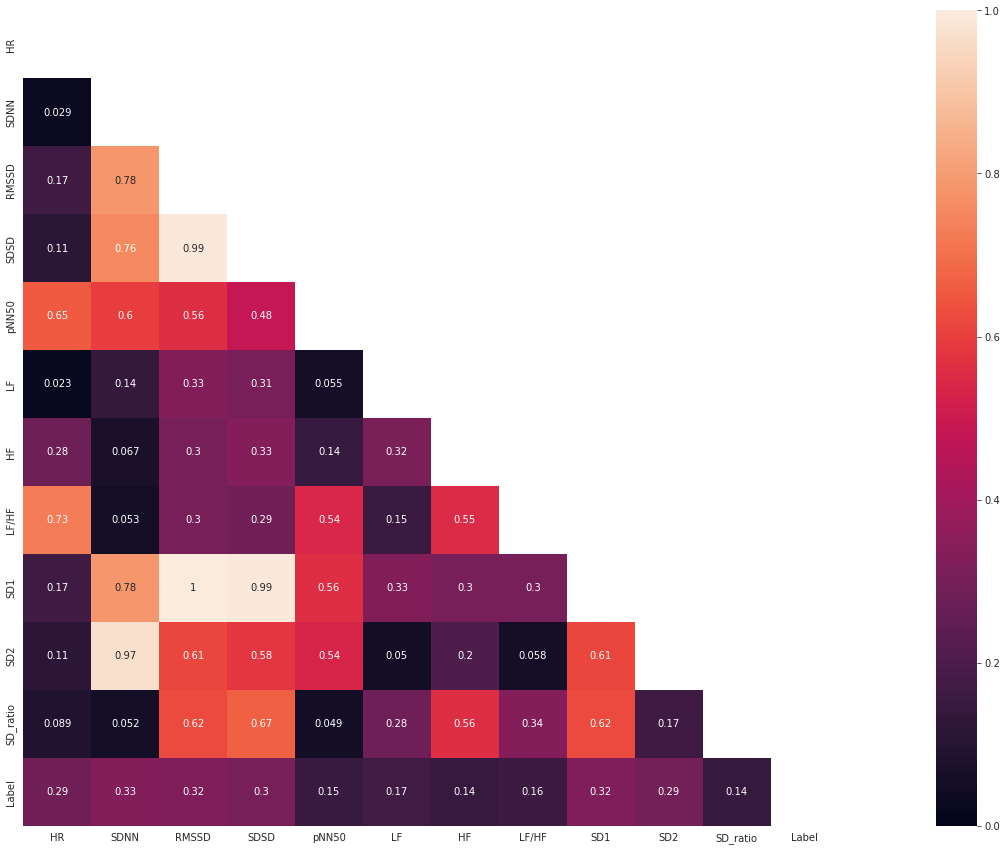

In [19]:
mask = np.zeros_like(data_copy.corr())
mask[np.triu_indices_from(mask)] = (
    True  # True = generate a mask of lower triangle of matrix
)
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(35, 15))
    sns.heatmap(data=corr_df, vmin=0, vmax=1, mask=mask, square=True, annot=True)

In [20]:
strong_relation_features = (
    pd.Series(corr_df["Label"]).nlargest(n=9).iloc[1:]
)  # nlargest(n=9)==> take 8 features
strong_relation_features

SDNN     0.328316
SD1      0.321456
RMSSD    0.321452
SDSD     0.301533
SD2      0.294477
HR       0.289428
LF       0.171785
LF/HF    0.159306
Name: Label, dtype: float64